In [2]:
#All Imports Needed 
import numpy as np
import matplotlib.pyplot as plt

#VERY IMPORTANT NOTE; Momentum will be mentioned throughout the code, I unfortunately mistook Energy for Momentum for a part of 
#this experiment, please ignore this. All generated outputs have been corrected however, code has not been changed due to time
#constraints

In [252]:
#Functions used throughout code

#Simple Ohm's Law formula
def OhmsLaw(V,R):
    I = V/R
    
    return I 

#Base Error Function for Plate and Shield Voltages
def VspError(Vdata):
    i=0
    Verror = np.array([])
    while(i<len(Vdata)):
        if(Vdata[i] < 200):
            Verror = np.append(Verror, 5*10**(-5))
            i=i+1
        
        if(i>=len(Vdata)):
            return(Verror)
        
        if(Vdata[i] > 200):
            Verror = np.append(Verror, 5*10**(-4))
            i=i+1
            
    return(Verror)

#Measure that scales like momentum (x axis on graphs)
def ElectronMomentum(V,Vs):
    Energy = V - Vs
    Momentum = Energy**(1/2)
    
    return Momentum

#Probability of transmission
def ScatteringProbability(Vp,VpF,Vs,VsF):
    Ps = 1 - ((Vp*VsF)/(Vs*VpF))
    
    return(Ps)

def ShieldToCathodeExtension(V,Vs):
    return -(V + Vs)
    
    
#Measure that scales like momentum (x axis on graphs)
def ElectronMomentumCorrected(V,Vs,Vc,Vbar):
    Energy = V - Vs + Vc + Vbar
    Momentum = Energy**(1/2)
    
    return Momentum

#Error On Probability Function
def ProbabilityError(Vp,VpF,Vs,VsF,VpError,VpFError,VsError,VsFError):
    
    DerivativeVp = -(VsF/(Vs*VpF))
    DerivativeVsF = -(Vp/(Vs*VpF))
    DerivativeVs = ((Vp*VsF)/((Vs**2)*VpF))
    DerivativeVpF = ((Vp*VsF)/(Vs*(VpF**2)))
    
    ProbError = (((DerivativeVp**2)*(VpError**2)) + ((DerivativeVsF**2)*(VsFError**2)) + 
                 ((DerivativeVpF**2)*(VpFError**2)) + ((DerivativeVs**2)*(VsError**2)))**(1/2)
    
    return(ProbError)

#Vbar Error
def VbarErrorFunction(FittedSlope , ErrorOnSlope):
    
    Error = (3/2)*(FittedSlope**(-2))*ErrorOnSlope
    
    return(Error)

#Contact Voltage Error
def VcErrorFunction(Slope1,Slope2,Intercept1,Intercept2,Slope1Error,Slope2Error):
    
    Error = ((((Intercept1 - Intercept2)**2)/((Slope1 - Slope2)**4))*(Slope1Error**2 + Slope2Error**2))**(1/2)
    
    return(Error)

#Corrected Momentum Error 

def CorrectedMomentumErrorFunction(V,Vs,Vc,Vbar,VError,VsError,VcError,VbarError):
    
    NonSpecificDerivative = (1/2)*(V-Vs+Vc+Vbar)**(-1/2)
    
    Error = NonSpecificDerivative*((VError + VsError + VcError + VbarError)**(1/2))
    
    return(Error)

#Normal Momentum Error
def MomentumErrorFunction(V,Vs,VError,VsError):
    
    NonSpecificDerivative = (1/2)*(V-Vs)**(-1/2)
    
    Error = NonSpecificDerivative*((VError + VsError)**(1/2))
    
    return(Error)
    




In [243]:
#Manually Transferring the data from notebook to software for storage in txt files
#Acelerating voltages are taken in Volts but shield and plate voltages are in mili Volts

#Acelerating Voltages

VError = 0.0005*(np.ones(len(V)))
V = np.array([0.05, 0.10, 0.15, 0.20, 0.25, 0.28, 0.31, 0.34, 0.37, 0.40, 0.43, 0.46, 0.49, 0.52, 0.55, 0.58, 0.61, 0.64,
             0.67, 0.70, 0.73, 0.76, 0.79, 0.82, 0.85, 0.90, 0.95, 1.00, 1.05, 1.10, 1.15, 1.20, 1.25, 1.28, 1.31, 1.34, 
             1.37, 1.40, 1.43, 1.46, 1.49, 1.52, 1.55, 1.58, 1.61, 1.64, 1.67, 1.70, 1.75, 1.80, 1.85, 1.90, 1.95, 2.00,
             2.05, 2.10, 2.20, 2.30, 2.40, 2.50, 2.6, 2.7, 2.8, 2.9, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 
             5.75, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13])



#Non Frozen Shield Voltages

Vs1 = np.array([2, 2.8, 3.9, 5.1, 6.5, 7.4, 8.3, 9.3, 10.5, 11.5, 12.7, 13.8, 15.0, 16.1, 17.4, 18.6, 19.9, 21.3, 22.7, 24.1, 
               25.4, 26.8, 28.2, 29.6, 31.1, 33.5, 36.1, 38.7, 41.2, 43.9, 46.5, 49.4, 52.2, 53.9, 55.5, 57.2, 59.0, 60.6,
               62.4, 64.2, 66.1, 67.8, 69.6, 72.7, 73.3, 75.0, 76.9, 78.8, 81.8, 85.0, 88.3, 91.4, 94.5, 97.7, 101.6, 104.7, 
               111.1, 117.8, 124.7, 131.2, 138.0, 144.8, 151.4, 158.4, 165.3, 182.4, 199, 216, 234, 251, 270, 289, 307, 326,
               345, 365, 384, 426, 470, 515, 562, 610, 662, 714, 766, 820, 876, 934, 1000, 1131, 1724])
        
Vs1Error = VspError(Vs1)



#Non Frozen Plate Voltages

Vp1 = np.array([1.6, 2.2, 2.8, 3.6, 4.3, 4.7, 5.2, 5.7, 6.2, 6.7, 7.2, 7.7, 8.1, 8.5, 9.0, 9.4, 9.8, 10.3, 10.7, 11.1, 11.4, 
               11.8, 12.1, 12.4, 12.7, 13.2, 13.7, 14, 14.4, 14.7, 14.9, 15.2, 15.4, 15.4, 15.5, 15.5, 15.6, 15.6, 15.7, 15.7,
               15.7, 15.7, 15.7, 15.6, 15.6, 15.6, 15.5, 15.5, 15.4, 15.3, 15.1, 15, 14.8, 14.7, 14.5, 14.4, 14.1, 13.8, 13.5,
               13.3, 13, 12.8, 12.6, 12.5, 12.5, 12.3, 12.1, 12, 12, 12.1, 12.2, 12.4, 12.6, 12.8, 13.1, 13.5, 14, 15.1,
               16.5, 18.1, 20.1, 22.6, 25.8, 29.6, 34.3, 39.9, 46.8, 
               55.3, 68.9, 113.5, 563])

Vp1Error = VspError(Vp1)



#Frozen Shield Voltages

Vs2 = np.array([4.1, 5.5, 7.1, 8.7, 10.5, 11.5, 12.7, 13.8, 15.2, 16.3, 17.6, 18.9, 19.8, 21.4, 22.9, 24.3, 25.6, 27.3, 28.6, 30, 31.5,
               33.1, 34.5, 35.9, 37.5, 40.1, 45.8, 45.5, 48.2, 50.8, 53.7, 56.7, 59.6, 61.4, 63, 64.8, 66.6, 68.3, 70.1, 71.9, 74,
               75.6, 77.6, 79.4, 81.3, 83.1, 85, 86.9, 89.9, 93.4, 96.7, 99.9, 103.2, 106.7, 110.9, 114.1, 120.7, 127.6, 134.8, 141.6,
               148.9, 156, 163, 170.7, 178, 196.5, 215, 234, 253, 272, 295, 315, 337, 359, 382, 406, 429, 480, 533, 588, 644, 702,
               763, 823, 885, 948, 1011, 1069, 1128, 1185, 1243])

Vs2Error = VspError(Vs2)



#Frozen Plate Voltages

Vp2 = np.array([5.2, 5.9, 6.6, 7.3, 8, 8.4, 8.8, 9.3, 9.8, 10.2, 10.7, 11.2, 11.3, 12.2, 12.7, 13.2, 13.8, 14.4, 14.9, 15.4, 16,
               16.6, 17.1, 17.7, 18.3, 19.3, 20.3, 21.3, 22.3, 23.3, 24.4, 25.5, 26.6, 27.2, 27.8, 28.5, 29.1, 29.7, 30.4, 31, 31.7,
               32.3, 32.9, 33.5, 34.2, 34.8, 35.4, 36, 37, 38.1, 39.2, 40.2, 41.3, 42.4, 43.6, 44.6, 46.7, 48.8, 51, 53.1, 55.3, 57.7,
               59.9, 62.4, 64.9, 71.6, 78.9, 86.7, 94.8, 103.1, 112.1, 120.6, 129.3, 138.2, 147.3, 156.4, 165.5, 183, 199, 218, 237,
               262, 286, 309, 331, 347, 361, 376, 396, 418, 442])

Vp2Error = VspError(Vp2)



#Acceleration Extension Voltages

Ve = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4])

VeError = 0.005*(np.ones(len(Ve)))



#Shield Extension Voltages

Vse = np.array([3.3, 2.5, 1.7, 1.2, 0.8, 0.5, 0.3, 0.2, 0.1])

VseError = VspError(Vse)


np.savetxt("AceleratingVoltages.txt", V)
np.savetxt("ShieldVoltagesUnfrozen.txt", (10**(-3))*Vs1)
np.savetxt("PlateVoltagesUnfrozen.txt", (10**(-3))*Vp1)
np.savetxt("ShieldVoltagesFrozen.txt", (10**(-3))*Vs2)
np.savetxt("PlateVoltagesFrozen.txt", (10**(-3))*Vp2)
np.savetxt("ExtensionVoltages.txt", Ve)
np.savetxt("ShieldVoltagesExtension.txt", (10**(-3))*Vse)

np.savetxt("AceleratingVoltagesErrors.txt", VError)
np.savetxt("ShieldVoltagesUnfrozenErrors.txt", Vs1Error)
np.savetxt("PlateVoltagesUnfrozenErrors.txt", Vp1Error)
np.savetxt("ShieldVoltagesFrozenErrors.txt", Vs2Error)
np.savetxt("PlateVoltagesFrozenErrors.txt", Vp2Error)
np.savetxt("ExtensionVoltagesErrors.txt", VeError)
np.savetxt("ShieldVoltagesExtensionErrors.txt", VseError)



0.689202437604511 0.017013926184468016


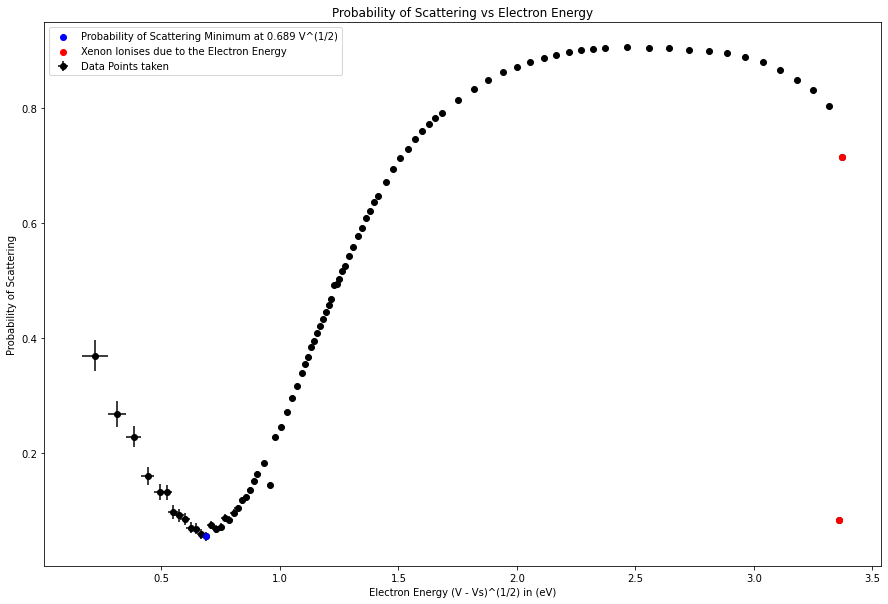

In [289]:
#Plotting Scattering Probability vs Electron Momentum

#Loading Data
VMeasured = np.loadtxt("AceleratingVoltages.txt") 
Vs = np.loadtxt("ShieldVoltagesUnfrozen.txt")
VsF = np.loadtxt("ShieldVoltagesFrozen.txt")
Vp = np.loadtxt("PlateVoltagesUnfrozen.txt")
VpF = np.loadtxt("PlateVoltagesFrozen.txt")

VError = np.loadtxt("AceleratingVoltagesErrors.txt")
VsError = np.loadtxt("ShieldVoltagesUnfrozenErrors.txt")
VpError = np.loadtxt("PlateVoltagesUnfrozenErrors.txt")
VsFError = np.loadtxt("ShieldVoltagesFrozenErrors.txt")
VpFError = np.loadtxt("PlateVoltagesFrozenErrors.txt")



ProbScat = ScatteringProbability(Vp,VpF,Vs,VsF)

ProbErrors = ProbabilityError(Vp,VpF,Vs,VsF,VpError,VpFError,VsError,VsFError)

EMomentum = ElectronMomentum(VMeasured,Vs)

EMomentumError = MomentumErrorFunction(VMeasured,Vs,VError,VsError)

plt.figure(figsize = (15,10))    
plt.errorbar(EMomentum, ProbScat, ProbErrors, EMomentumError, fmt = "o", color="black", zorder = 1)

plt.scatter([EMomentum[(np.where(ProbScat == min(ProbScat)))[0][0]]], [min(ProbScat)], color="blue", zorder = 2)
print(EMomentum[(np.where(ProbScat == min(ProbScat)))[0][0]], EMomentumError[(np.where(ProbScat == min(ProbScat)))[0][0]])
plt.scatter([EMomentum[len(EMomentum)-1],EMomentum[len(EMomentum)-2]], [ProbScat[len(ProbScat) -1], ProbScat[len(ProbScat) -2]], color="red", zorder = 3)

plt.title("Probability of Scattering vs Electron Energy")
plt.xlabel("Electron Energy (V - Vs)^(1/2) in (eV)")
plt.ylabel("Probability of Scattering")
plt.legend(["Probability of Scattering Minimum at 0.689 V^(1/2)", "Xenon Ionises due to the Electron Energy", "Data Points taken"])


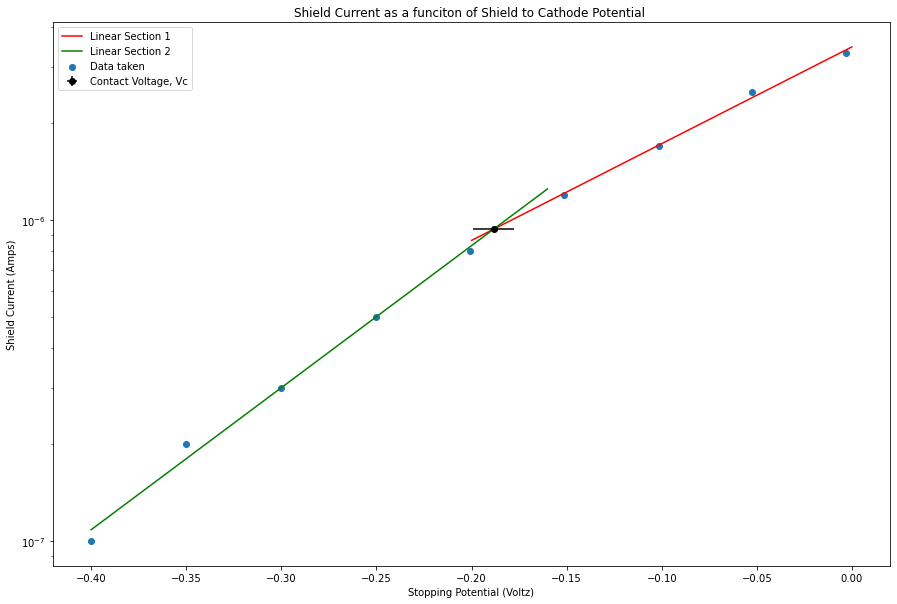

In [286]:
#Plotting Extension graph (current vs voltage) to find Vc and V bar

#Loading Data
VMeasuredExtension = np.loadtxt("ExtensionVoltages.txt") 
VsExtension = np.loadtxt("ShieldVoltagesExtension.txt")
IsExtension = VsExtension*10**(-3)

Vsc = ShieldToCathodeExtension(VMeasuredExtension,VsExtension)

OverallSlope = (np.polyfit(Vsc,np.log(IsExtension),1))[0]
ErrorOnOverallSlope = ((np.polyfit(Vsc,np.log(IsExtension),1, full=True))[1])/0.2

Vbar = (3/2)*(1/OverallSlope)

VbarError = VbarErrorFunction(OverallSlope, ErrorOnOverallSlope)



plt.figure(figsize = (15,10))
plt.scatter(Vsc, IsExtension)
plt.yscale('log')



#Linear Section 1

i=0
LS1Vsc = np.array([])
LS1Is = np.array([])
while(i<4):
    LS1Vsc = np.append(LS1Vsc, Vsc[i])
    LS1Is = np.append(LS1Is, np.log(IsExtension[i]))
    i = i+1
    
[LS1Slope , LS1Intercept], Residuals1 , blank, blank, blank = np.polyfit(LS1Vsc , LS1Is, 1, full=True)

def LS1Function(x):
    return(LS1Slope*x + LS1Intercept)

x1 = np.arange(-0.2, 0, 0.0001)
#print(x1)
plt.plot(x1, np.e**(LS1Function(x1)), color = "red")



#Linear Section 2

i=4
LS2Vsc = np.array([])
LS2Is = np.array([])
while(i<9):
    LS2Vsc = np.append(LS2Vsc, Vsc[i])
    LS2Is = np.append(LS2Is, np.log(IsExtension[i]))
    i = i+1
    
[LS2Slope , LS2Intercept] , Residuals2 , blank, blank, blank = np.polyfit(LS2Vsc , LS2Is, 1, full=True)

def LS2Function(x):
    return(LS2Slope*x + LS2Intercept)

x2 = np.arange(-0.4, -0.16, 0.0001)
#print(x2)
plt.plot(x2, np.e**(LS2Function(x2)), color = "green")


#Finding Contact Voltage, where linear section 1 meets linear section 2 

Vc = -(LS1Intercept - LS2Intercept)/(LS1Slope - LS2Slope)  #Contact Voltage

#print(XIntersection, LS1Function(XIntersection), LS2Function(XIntersection)) #Sanity Check

VcError = VcErrorFunction(LS1Slope,LS2Slope,LS1Intercept,LS2Intercept,Residuals1/0.1, Residuals2/0.1)

#Intersection of two linear sections, contact voltage
plt.errorbar([Vc], [np.e**(LS1Function(Vc))], [0], [VcError[0]], fmt="o", color = "black")



plt.title("Shield Current as a funciton of Shield to Cathode Potential ")
plt.xlabel("Stopping Potential (Voltz)")
plt.ylabel("Shield Current (Amps)")
plt.legend(["Linear Section 1", "Linear Section 2", "Data taken", "Contact Voltage, Vc"])

In [246]:
#Errors in Vc and Vbar
print(Vbar, VbarError)
print()
print(-Vc, VcError)

0.17230671576766607 [0.01138122]

0.18845377973454497 [0.01074698]


Energy at minimum scattering point  0.9141993740438741


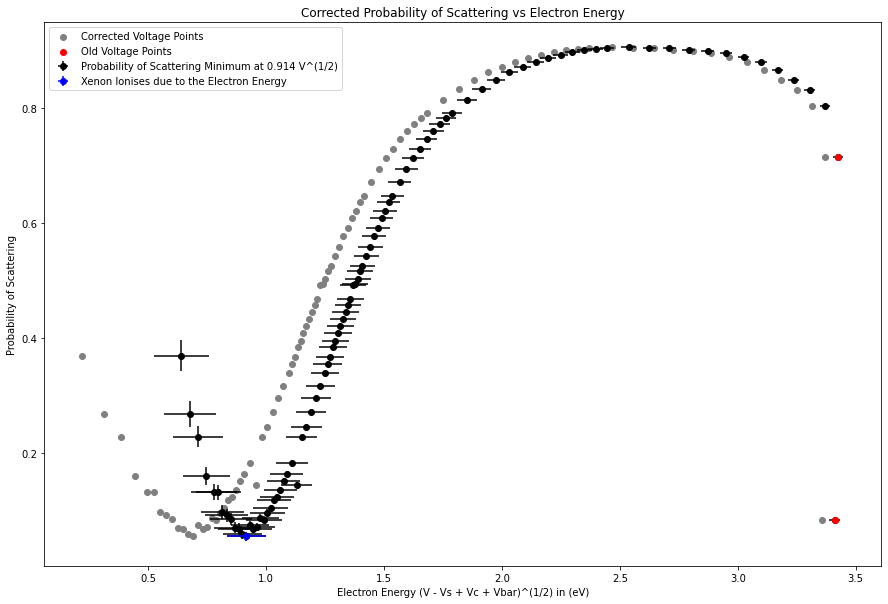

In [288]:
#Corrected Plotting Scattering Probability vs Electron Momentum

#Loading Data
VMeasured = np.loadtxt("AceleratingVoltages.txt") 
Vs = np.loadtxt("ShieldVoltagesUnfrozen.txt")
VsF = np.loadtxt("ShieldVoltagesFrozen.txt")
Vp = np.loadtxt("PlateVoltagesUnfrozen.txt")
VpF = np.loadtxt("PlateVoltagesFrozen.txt")

VError = np.loadtxt("AceleratingVoltagesErrors.txt")
VsError = np.loadtxt("ShieldVoltagesUnfrozenErrors.txt")
VpError = np.loadtxt("PlateVoltagesUnfrozenErrors.txt")
VsFError = np.loadtxt("ShieldVoltagesFrozenErrors.txt")
VpFError = np.loadtxt("PlateVoltagesFrozenErrors.txt")


#Using the probability function created earlier and the error on the probability function
ProbScat = ScatteringProbability(Vp,VpF,Vs,VsF)

ProbErrors = ProbabilityError(Vp,VpF,Vs,VsF,VpError,VpFError,VsError,VsFError)


#Using the momentum like function that we defined earlier and the corrected version including the extension values
EMomentum = ElectronMomentum(VMeasured,Vs)
EMomentumCorrected = ElectronMomentumCorrected(VMeasured,Vs,-Vc,Vbar)

#needs work
EMomentumCorrectedError = CorrectedMomentumErrorFunction(VMeasured,Vs,-Vc,Vbar,VError,VsError,VcError,VbarError)

plt.figure(figsize = (15,10))    
plt.errorbar(EMomentumCorrected, ProbScat, ProbErrors, EMomentumCorrectedError, fmt = "o", color="black", zorder = 2)
plt.scatter(EMomentum, ProbScat, color="grey", zorder = 1)


MinimumScatter = (np.where(ProbScat == min(ProbScat)))[0][0]

plt.errorbar([EMomentumCorrected[MinimumScatter]], [min(ProbScat)], ProbErrors[MinimumScatter], EMomentumCorrectedError[MinimumScatter], fmt="o", color="blue", zorder = 3)
print("Energy at minimum scattering point ", EMomentumCorrected[(np.where(ProbScat == min(ProbScat)))[0][0]])
plt.scatter([EMomentumCorrected[len(EMomentumCorrected)-1],EMomentumCorrected[len(EMomentumCorrected)-2]], [ProbScat[len(ProbScat) -1], ProbScat[len(ProbScat) -2]], color="red", zorder = 4)

plt.title("Corrected Probability of Scattering vs Electron Energy")
plt.xlabel("Electron Energy (V - Vs + Vc + Vbar)^(1/2) in (eV)")
plt.ylabel("Probability of Scattering")
plt.legend(["Corrected Voltage Points", "Old Voltage Points", "Probability of Scattering Minimum at 0.914 V^(1/2)", "Xenon Ionises due to the Electron Energy"])


In [251]:
#See how far our data is from the predicted 1eV minimum point

print(EMomentumCorrected[MinimumScatter], EMomentumCorrectedError[MinimumScatter])

print(EMomentumCorrected[MinimumScatter] + EMomentumCorrectedError[MinimumScatter])

0.9141993740438741 0.08236323416480851
0.9965626082086826


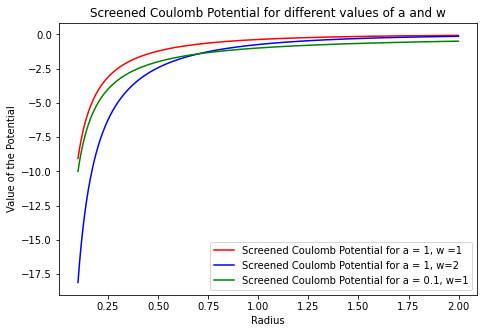

In [285]:
rSCP = np.arange(0.1,2, 0.001)

def ScreenedCoulombPotential(r,a,w):
    
    V = w*(-np.e**(-a*r))/r
    
    return(V)

plt.figure(figsize = (7.5,5))  

plt.plot(rSCP, ScreenedCoulombPotential(rSCP,1,1), color = "red")
plt.plot(rSCP, ScreenedCoulombPotential(rSCP,1,2), color = "blue")
plt.plot(rSCP, ScreenedCoulombPotential(rSCP,0.01,1), color = "green")

plt.title("Screened Coulomb Potential for different values of a and w")
plt.xlabel("Radius")
plt.ylabel("Value of the Potential")
plt.legend(["Screened Coulomb Potential for a = 1, w =1","Screened Coulomb Potential for a = 1, w=2","Screened Coulomb Potential for a = 0.1, w=1"])

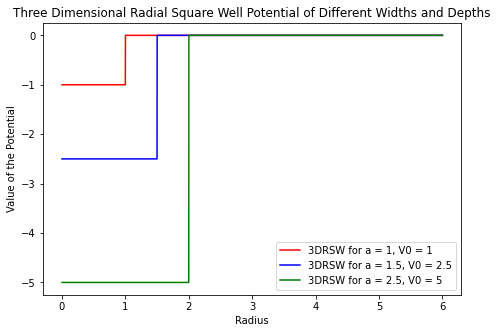

In [281]:
r3DSW = np.arange(0,6, 0.001)

def ThreeDRadialSquareWell(r,a,V0):
    
    i = 0
    V=np.array([])
    while(i<len(r)):
        
        if(r[i] < a):
            V = np.append(V, -V0)
            i = i+1
        
        else:
            V = np.append(V, 0)
            i=i+1
    
    return(V)

plt.figure(figsize = (7.5,5))  

plt.plot(r3DSW, ThreeDRadialSquareWell(r3DSW,1,1), color = "red")
plt.plot(r3DSW, ThreeDRadialSquareWell(r3DSW,1.5,2.5), color = "blue")
plt.plot(r3DSW, ThreeDRadialSquareWell(r3DSW,2,5), color = "green")

plt.title("Three Dimensional Radial Square Well Potential of Different Widths and Depths")
plt.xlabel("Radius")
plt.ylabel("Value of the Potential")
plt.legend(["3DRSW for a = 1, V0 = 1","3DRSW for a = 1.5, V0 = 2.5","3DRSW for a = 2.5, V0 = 5"])